### Agent multiple tools

In [16]:
import os
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
load_dotenv() 
os.environ["TAVLIY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
model  = init_chat_model("groq:qwen/qwen3-32b")


### integrate tavily

In [19]:
from langchain_tavily import TavilySearch
tavily_search_tool = TavilySearch(
    max_results=5,
    topic="general"
)
# tool.invoke("Current ai news")

In [ ]:
from langchain.tools import tool
@tool("calculator", description="Performs arithmetic calculations. Use this for any math problems.")
def calc(expression: str) -> str:
    """Evaluate mathematical expressions."""
    return str(eval(expression))



<function langchain_core.tools.convert.tool(name_or_callable: str | collections.abc.Callable | None = None, runnable: langchain_core.runnables.base.Runnable | None = None, *args: Any, description: str | None = None, return_direct: bool = False, args_schema: type[pydantic.main.BaseModel] | dict[str, typing.Any] | None = None, infer_schema: bool = True, response_format: Literal['content', 'content_and_artifact'] = 'content', parse_docstring: bool = False, error_on_invalid_docstring: bool = True, extras: dict[str, typing.Any] | None = None) -> langchain_core.tools.base.BaseTool | collections.abc.Callable[[collections.abc.Callable | langchain_core.runnables.base.Runnable], langchain_core.tools.base.BaseTool]>

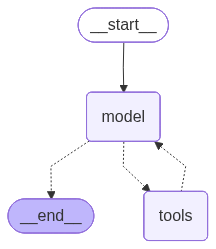

In [31]:
from langchain.agents import create_agent

agent = create_agent(
    model=model,
    tools=[calc,tavily_search_tool]
)
agent


In [35]:
for step in agent.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    stream_mode="values"
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

what  is the current news  for antropic  and then calculate 5 + 5
================================== Ai Message ==================================
Tool Calls:
  tavily_search (q0nnzrejz)
 Call ID: q0nnzrejz
  Args:
    query: current news about antropic
    time_range: week
    topic: news
  calculator (fn6jz0v82)
 Call ID: fn6jz0v82
  Args:
    expression: 5 + 5
================================= Tool Message =================================
Name: calculator

10
================================== Ai Message ==================================

Here's the information you requested:

**Current News About Anthropic:**
1. **Revenue Growth**: Anthropic's revenue run rate has surpassed $9 billion, with significant investments from VCs like Coatue Management, GIC, and Iconiq Capital.
2. **Claude's New Constitution**: Anthropic published a detailed constitution outlining values and behavior guidelines for their A

In [37]:
agent.invoke({"messages":"What is the  current AI News"})

{'messages': [HumanMessage(content='What is the  current AI News', additional_kwargs={}, response_metadata={}, id='3e91c718-68f4-4f5f-a767-a8dd3938d0ca'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the current AI news. Let me see how to approach this.\n\nFirst, I need to use the tavily_search function since it\'s about current events. The query should be "current AI news". \n\nThe user wants the latest information, so I should set the time_range to "day" to get the most recent articles. Also, the topic should be "news" because it\'s about current events covered by mainstream media. \n\nI don\'t need to exclude or include specific domains unless the user specified, which they didn\'t. So those parameters can stay default. Search depth can be "basic" unless the user needs in-depth analysis, which they didn\'t mention. \n\nInclude images might be helpful here since news articles often have relevant images. Let me set that to True. \n\nDou